In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kimginam/Downloads/trainticket.csv')

In [3]:
df = df.drop(['price_tree', 'batch', 'id'], axis=1)

In [4]:
df['start_date'].value_counts()

2019-05-12 16:30:00    3
2019-05-17 16:30:00    3
2019-05-01 07:00:00    3
2019-05-01 17:00:00    3
2019-04-18 07:00:00    3
                      ..
2019-04-28 12:42:00    1
2019-05-01 08:40:00    1
2019-05-10 08:00:00    1
2019-05-12 12:00:00    1
2019-05-18 16:30:00    1
Name: start_date, Length: 866, dtype: int64

### Time band

In [5]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['new_time'] = df['start_date'].apply(lambda x: x.strftime('%H%M'))

In [6]:
df['new_time'] = df['new_time'].astype(int)

In [7]:
df['new_time'].dtype

dtype('int64')

In [8]:
r = [0, 900, 1200, 1500, 1800, 2200]
g = [0,1,2,3,4]
df['new_start_time'] = pd.cut(df['new_time'], bins=r, labels=g)

In [9]:
df['start_date'].value_counts()

2019-05-17 16:30:00    3
2019-05-12 16:30:00    3
2019-04-18 07:00:00    3
2019-05-01 17:00:00    3
2019-05-01 18:00:00    3
                      ..
2019-04-15 09:00:00    1
2019-04-30 15:30:00    1
2019-06-01 11:55:00    1
2019-04-24 08:00:00    1
2019-04-30 07:30:00    1
Name: start_date, Length: 866, dtype: int64

In [10]:
df.loc[df['start_date'] == '2019-04-15 18:0:00']

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,new_time,new_start_time
279,2019-04-11 21:51:24,MADRID,SEVILLA,2019-04-15 18:00:00,2019-04-15 20:32:00,AVE,60.3,Turista,Promo,1800,3


In [11]:
df = df.drop(['new_time'], axis=1)

In [12]:
df.rename(columns={'new_start_time': 'start_time'}, inplace=True)

In [13]:
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,start_time
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo,0
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo,0
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo,0
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo,0
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:30:00,2019-04-18 11:15:00,AVE,107.70,Turista,Flexible,0


### Visualization

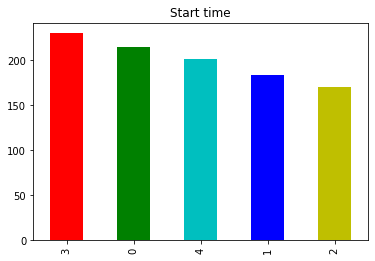

In [14]:
plt.title('Start time')
df['start_time'].value_counts().plot.bar(color=('r', 'g', 'c', 'b', 'y'))

In [15]:
df['start_time'].value_counts()

3    230
0    215
4    201
1    184
2    170
Name: start_time, dtype: int64

In [16]:
from datetime import datetime
df['Day_name'] = df['start_date'].dt.day_name()

In [17]:
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,start_time,Day_name
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo,0,Thursday
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo,0,Thursday
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo,0,Thursday
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo,0,Thursday
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:30:00,2019-04-18 11:15:00,AVE,107.70,Turista,Flexible,0,Thursday


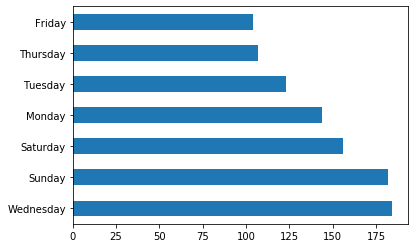

In [18]:
df['Day_name'].value_counts().plot.barh()

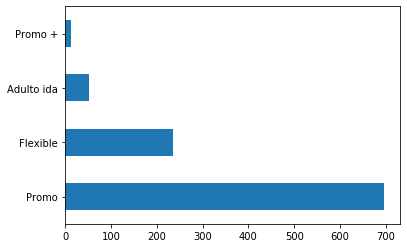

In [19]:
df['fare'].value_counts().plot.barh()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   insert_date  1000 non-null   object        
 1   origin       1000 non-null   object        
 2   destination  1000 non-null   object        
 3   start_date   1000 non-null   datetime64[ns]
 4   end_date     1000 non-null   object        
 5   train_type   1000 non-null   object        
 6   price        889 non-null    float64       
 7   train_class  999 non-null    object        
 8   fare         999 non-null    object        
 9   start_time   1000 non-null   category      
 10  Day_name     1000 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), object(8)
memory usage: 79.4+ KB


In [45]:
df.shape

(1000, 11)

Text(0.5, 1.0, 'Total Missing Value (%)')

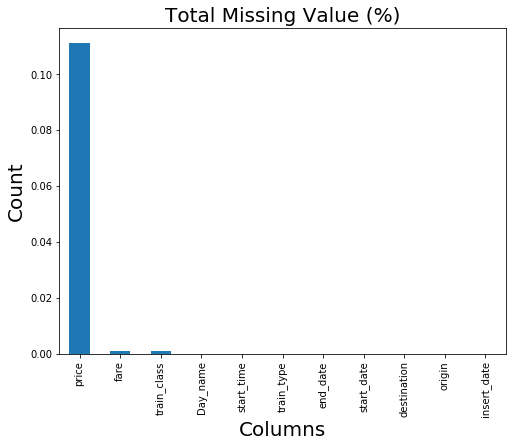

In [46]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [48]:
train_fare = ['fare', 'train_class']
for i in train_fare:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [50]:
df.loc[df.price.isnull(), 'price'] = df.groupby('fare').price.transform('mean')

Text(0.5, 1.0, 'Total Missing Value (%)')

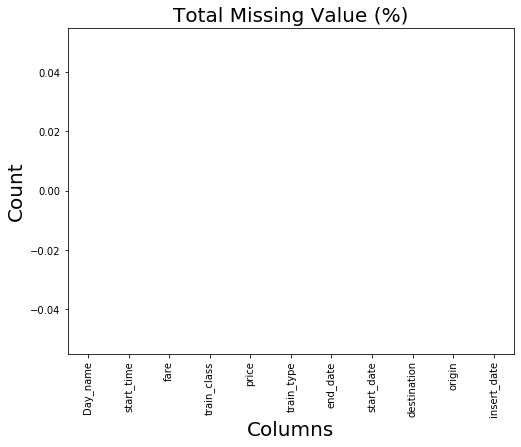

In [51]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [53]:
df.isnull().any()

insert_date    False
origin         False
destination    False
start_date     False
end_date       False
train_type     False
price          False
train_class    False
fare           False
start_time     False
Day_name       False
dtype: bool